# 출처: https://wikidocs.net/24586

In [1]:
# Reuter 분류기와 비슷하지만 이진 분류

In [2]:
from tensorflow.keras.datasets import imdb
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# 1. 데이터 확인

In [3]:
# test_split 파라미터를 지원하지 않는다
(X_train, y_train), (X_test, y_test) = imdb.load_data()

17465344/17464789 [==============================] - 14s 1us/step


In [4]:
print('훈련용 리뷰 갯수 : {}'.format(len(X_train)))
print('테스트용 리뷰 갯수 : {}'.format(len(X_test)))
num_classes = max(y_train)+1
print('카테고리 : {}'.format(num_classes))

훈련용 리뷰 갯수 : 25000
테스트용 리뷰 갯수 : 25000
카테고리 : 2


In [5]:
print(X_train[0])
print(y_train[0])
# 1: 긍정, 2: 부정

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 22665, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 21631, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 31050, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
1


In [6]:
print('리뷰의 최대 길이 : {}'.format(max(len(l) for l in X_train)))
print('리뷰의 평균 길이 : {}'.format(sum(len(l) for l in X_train)/len(X_train)))

리뷰의 최대 길이 : 2494
리뷰의 평균 길이 : 238.71364


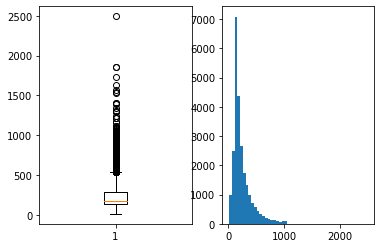

In [7]:
len_result = [len(s) for s in X_train]

plt.subplot(1,2,1)
plt.boxplot(len_result)
plt.subplot(1,2,2)
plt.hist(len_result, bins = 50)
plt.show()

In [8]:
# 레이블의 분포 확인
unique_elements, counts_elements = np.unique(y_train, return_counts = True)
print("각 레이블에 대한 빈도수: ")
print(np.asarray((unique_elements, counts_elements)))

각 레이블에 대한 빈도수: 
[[    0     1]
 [12500 12500]]


In [9]:
word_to_index = imdb.get_word_index()

1646592/1641221 [==============================] - 1s 1us/step


In [10]:
index_to_word = {}
for key, value in word_to_index.items():
    index_to_word[value] = key

In [12]:
print('빈도수 상위 {}번 단어 : {}'.format(1, index_to_word[1]))

빈도수 상위 1번 단어 : the


In [13]:
print('빈도수 상위 {}번 단어 : {}'.format(2, index_to_word[2]))

빈도수 상위 2번 단어 : and


In [11]:
print('빈도수 상위 {}번 단어 : {}'.format(3, index_to_word[3]))

빈도수 상위 3번 단어 : a


In [15]:
print(' '.join([index_to_word[X] for X in X_train[0]]))

the as you with out themselves powerful lets loves their becomes reaching had journalist of lot from anyone to have after out atmosphere never more room titillate it so heart shows to years of every never going villaronga help moments or of every chest visual movie except her was several of enough more with is now current film as you of mine potentially unfortunately of you than him that with out themselves her get for was camp of you movie sometimes movie that with scary but pratfalls to story wonderful that in seeing in character to of 70s musicians with heart had shadows they of here that with her serious to have does when from why what have critics they is you that isn't one will very to as itself with other tricky in of seen over landed for anyone of gilmore's br show's to whether from than out themselves history he name half some br of 'n odd was two most of mean for 1 any an boat she he should is thought frog but of script you not while history he heart to real at barrel but whe

# 2. LSTM으로 IMDB 리뷰 감성 분류하기

In [17]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import load_model

In [18]:
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words = 5000)

In [19]:
max_len = 500
X_train = pad_sequences(X_train, maxlen = max_len)
X_test = pad_sequences(X_test, maxlen = max_len)

In [20]:
model = Sequential()
model.add(Embedding(5000,120))
model.add(LSTM(120))
model.add(Dense(1, activation='sigmoid'))

W0529 23:41:04.948463 15544 deprecation.py:506] From c:\users\yunja_kuj61s9\appdata\local\programs\python\python36\lib\site-packages\tensorflow\python\keras\initializers.py:119: calling RandomUniform.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0529 23:41:04.984366 15544 deprecation.py:506] From c:\users\yunja_kuj61s9\appdata\local\programs\python\python36\lib\site-packages\tensorflow\python\ops\init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [21]:
es = EarlyStopping(monitor = 'val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=64, callbacks=[es,mc])

W0529 23:42:52.537481 15544 deprecation.py:323] From c:\users\yunja_kuj61s9\appdata\local\programs\python\python36\lib\site-packages\tensorflow\python\ops\nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 25000 samples, validate on 25000 samples
Epoch 1/10
20416/25000 [=======================>......] - ETA: 3:15 - loss: 0.4742 - acc: 0.7671

In [ ]:
loaded_model = load_model('best_model.h5')
print('\n 테스트 정확도: %.4f' %(loaded_model.evaluate(X_test, y_test)[1]))